In [33]:
import numpy as np
import scipy.ndimage as ndim
from functools import reduce
from celluloid import Camera
import matplotlib.pyplot as plt

import pandas as pd

In [34]:
def object_labeler(im_array):
    return ndim.label(im_array, ndim.generate_binary_structure(2, 2))


def separate_labeled_objects(im_array, labeled_arr, max_label=None):
    max_label = np.max(labeled_arr) if max_label is None else max_label
    return [im_array * (labeled_arr == label + 1)
            for label in range(max_label)]


def separate_objects(im_array):
    return separate_labeled_objects(im_array, *object_labeler(im_array))


def get_perimeters(obj_array, thickness=3):
    filled_and_eroded = ndim.binary_erosion(ndim.binary_fill_holes(obj_array))
    perim = [np.logical_and(np.logical_not(filled_and_eroded), obj_array)]
    eroded = np.logical_and(filled_and_eroded, obj_array)
    if not eroded.any():
        return perim
    return perim + [get_perimeters(eroded_arr) for eroded_arr in separate_objects(eroded)]


def make_cord_grid(arr):
    return np.meshgrid(np.arange(0, arr.shape[0]), np.arange(0, arr.shape[1]))


def perimeter_cords(perim_arr, cord_arr):
    pass

In [35]:
out = scale_to_white_to_black(
        numpy_image_to_greyscale(
                image_to_numpy_array(
                        open_image("example_image_5.png"))))

In [42]:
out = (out!=0)

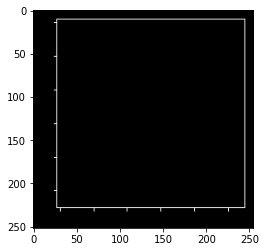

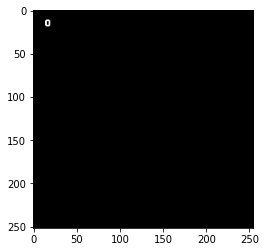

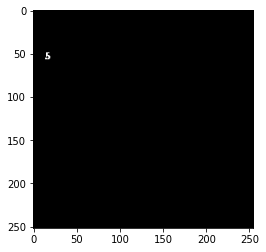

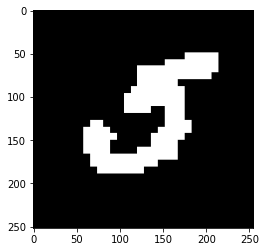

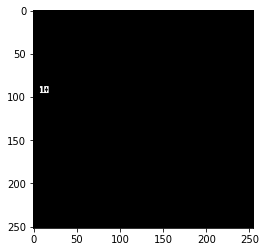

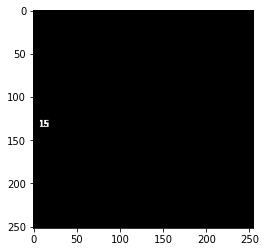

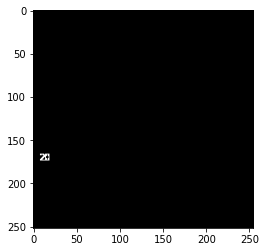

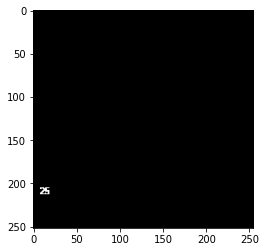

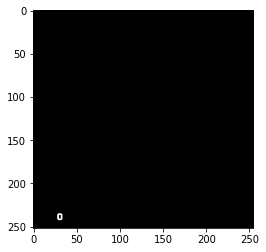

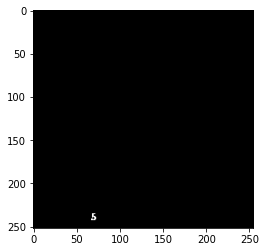

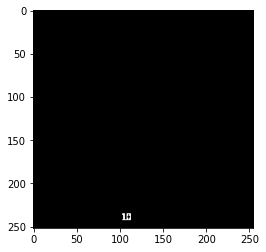

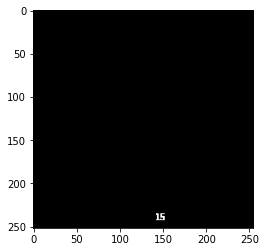

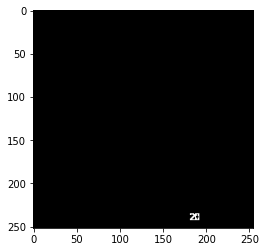

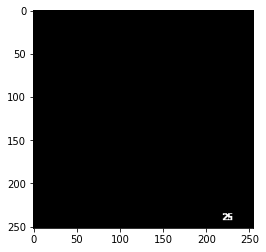

In [43]:
objs = separate_objects(out)
for arr in objs:
    show_image(arr)

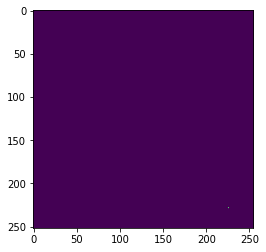

In [44]:
fig = plt.figure()
i = 0
obj = objs[i]

cam = Camera(fig)
for perim in get_perimeters(obj):
    plt.imshow(np.squeeze(perim))
    cam.snap()

animation = cam.animate()
animation.save(f'test{i}.gif')